# SQL을 이용해 DB와 대화해보자
https://legacy.python.org/dev/peps/pep-0249/
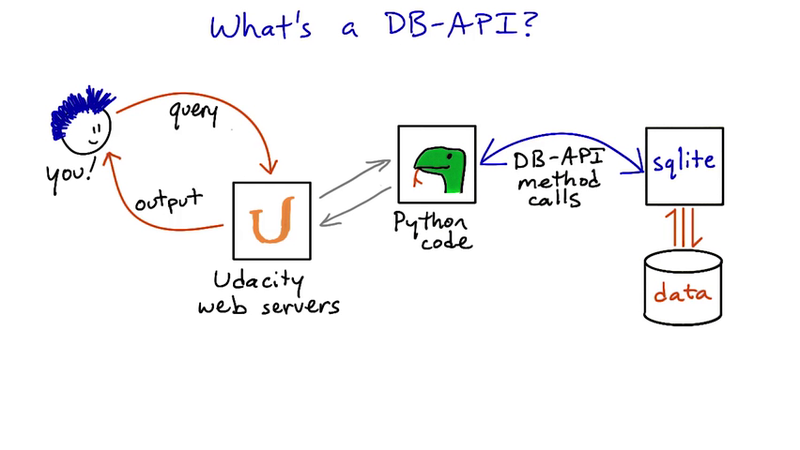

#### SQLite 
SQLite는 서버의 필요 없이 DB의 파일에 기초하여 DB 처리를 구현한 임베디드 SQL DB 엔진입니다.

#### 파이썬과 DB
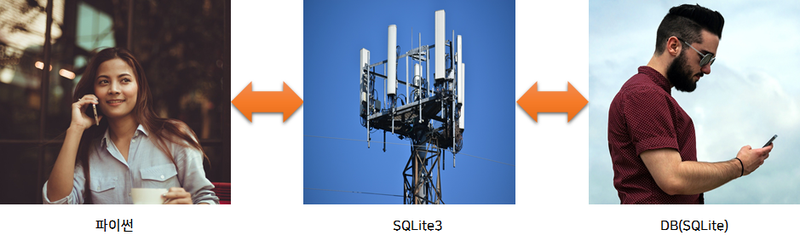

### Python DB API

In [2]:
# 파이썬 기본 제공 라이브러리
import sqlite3

# 파이썬과 DB 연결
import os
db_path = os.getenv('HOME')+'/mydb.db' # 이름을 정하면 됨
conn = sqlite3.connect(db_path)  # mydb.db에 연결합니다.
print(conn)

In [3]:
# Connect() 함수의 연결을 사용하는 새로운 Cursor 객체 생성
c = conn.cursor()
print(c)

In [4]:
# SQL문 실행

# stocks이라는 이름의 테이블을 하나 생성합니다. 혹시 이미 생성되었다면 생략합니다. 
c.execute("CREATE TABLE  IF NOT EXISTS  stocks (date text, trans text, symbol text, qty real, price real)")

# stocks 테이블에 데이터를 하나 인서트합니다. 
c.execute("INSERT INTO stocks VALUES ('20200701', 'TEST', 'AIFFEL', 1, 10000)")

# 방금 인서트한 데이터를 조회해 봅니다.
c.execute("SELECT * FROM stocks")

# 조회된 내역을 커서를 통해 가져와 출력해 봅니다.
print(c.fetchone())

('20200701', 'TEST', 'AIFFEL', 1.0, 10000.0)


### commit
삽입, 갱신, 삭제 등의 SQL 질의가 끝났다면 conn.commit()를 호출해야 DB가 실제로 업데이트 됩니다. 

이런 것을 데이터베이스에서는 트랜잭션(transaction) 관리라고 합니다.

In [5]:
# commit()은 cursor의 메소드가 아니라 connection의 메소드입니다. 
conn.commit()

In [6]:
# commit()을 완료했다면 DB와 대화하는 것을 마무리 지어야 합니다.
c.close()      # 먼저 커서를 닫은 후
conn.close()    # DB 연결을 닫아 줍니다.

### DDL 문으로 테이블 생성하기

In [8]:
import sqlite3
import os
db_path = os.getenv('HOME')+'/mydb.db'

conn = sqlite3.connect(db_path)
c = conn.cursor()

#- ! 재실행 시 테이블이 존재할 수 있으므로 아래처럼 해당 테이블들을 모두 지워줍니다.
c.execute("DROP TABLE IF EXISTS 도서대출내역")
c.execute("DROP TABLE IF EXISTS 도서대출내역2")
c.execute("DROP TABLE IF EXISTS 대출내역")
c.execute("DROP TABLE IF EXISTS 도서명")


#----- 1st table : 도서대출내역 -----#
c.execute("CREATE TABLE IF NOT EXISTS 도서대출내역 (ID varchar, 이름 varchar, 도서ID varchar, 대출일 varchar, 반납일 varchar)")
#- 생성(create)문 : 테이블명, 변수명, 변수타입을 지정

data = [('101','문강태','aaa','2020-06-01','2020-06-05'),
             ('101','문강태','ccc','2020-06-20','2020-06-25'),
             ('102','고문영','bbb','2020-06-01',None),
             ('102','고문영','ddd','2020-06-08',None),
             ('103','문상태','ccc','2020-06-01','2020-06-05'),
             ('104','강기둥',None,None,None)]
#- 입력할 데이터를 그대로 입력 (변수명 순서 기준대로)

c.executemany('INSERT INTO 도서대출내역 VALUES (?,?,?,?,?)', data)
#- 입력할 데이터를 실제 테이블에 insert하기
#-----------------------------------------------#


#----- 2nd table : 도서대출내역2 -----#
c.execute("CREATE TABLE IF NOT EXISTS 도서대출내역2 (ID varchar, 이름 varchar, 대출년월 varchar, 대출일수 varchar)")

data = [('101','문강태','2020-06','20일'),
             ('102','고문영','2020-06','10일'),
             ('103','문상태','2020-06','8일'),
             ('104','강기둥','2020-06','3일')]
c.executemany('INSERT INTO 도서대출내역2 VALUES (?,?,?,?)', data)
#--------------------------------------------------#


#----- 3rd table : 대출내역 -----#
c.execute("CREATE TABLE IF NOT EXISTS 대출내역 (ID varchar, 이름 varchar, 도서ID varchar)")

data = [('101','문강태','aaa'),
             ('102','고문영','bbb'),
             ('102','고문영','fff'),
             ('103','문상태','ccc'),
             ('104','강기둥',None)]
c.executemany('INSERT INTO 대출내역 VALUES (?,?,?)', data)
#-----------------------------------------#


#----- 4th table : 도서명 -----#
c.execute("CREATE TABLE IF NOT EXISTS 도서명 (도서ID varchar, 도서명 varchar)")

data = [('aaa','악몽을 먹고 자란 소년'),
             ('bbb','좀비아이'),
             ('ccc','공룡백과사전'),
             ('ddd','빨간구두'),
             ('eee','잠자는 숲속의 미녀')]

# executemany() 메소드를 이용해서 한꺼번에 여러 개의 데이터 처리 가능
c.executemany('INSERT INTO 도서명 VALUES (?,?)', data)
#--------------------------------------#

conn.commit()
conn.close()

In [9]:
# 확인
conn = sqlite3.connect(db_path)
c = conn.cursor()

for row in c.execute('SELECT * FROM 도서명'):
  print(row)

('aaa', '악몽을 먹고 자란 소년')
('bbb', '좀비아이')
('ccc', '공룡백과사전')
('ddd', '빨간구두')
('eee', '잠자는 숲속의 미녀')


## SQL
DB라는 공간에 ‘정형화된’(일정한 형식으로 수집되는) 데이터가 차곡차곡 저장되어 있습니다.  
이러한 DB를 특정 언어로 조회해서 가져오는데, 그때 사용하는 언어가 바로 SQL입니다.
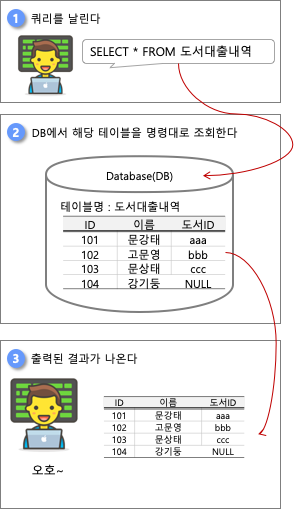
SELECT * FROM 도서대출내역 이 바로 SQL입니다.

### 쿼리의 기본 구조
- `SELECT ~`: 조회할 컬럼명을 선택
- `FROM ~`: 조회할 테이블명을 지정 (위치와 테이블명을 입력)
- `WHERE ~`: 질의할 때 필요한 조건을 설정
- `GROUP BY ~`: 특정 컬럼을 기준으로 그룹을 지어 출력
- `ORDER BY ~`: SELECT 다음에 오는 컬럼 중 정렬이 필요한 부분을 정렬 (기본 설정 : 오름차순)
- `LIMIT 숫자`: Display하고자 하는 행의 수를 설정

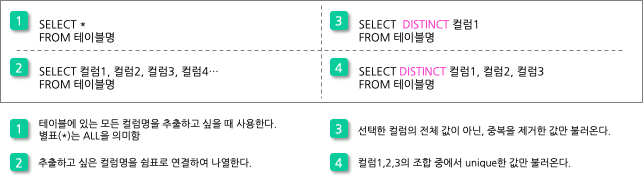
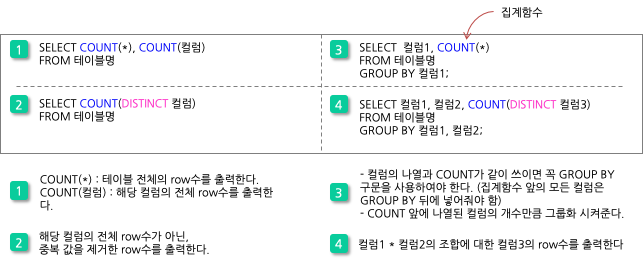

In [10]:
#- 참고 : 실제 조회를 해보시려면 아래처럼 쓰시면 됩니다.
#- c.execute() 괄호 안에 SQL문을 넣으시면 됩니다.

import sqlite3
import os
db_path = os.getenv('HOME')+'/mydb.db'
conn = sqlite3.connect(db_path)  # mydb.db에 연결합니다.
c = conn.cursor()

for row in c.execute('SELECT * FROM 도서대출내역'):
  print(row)

#- ! 출력 시 'NULL' 대신 'None'으로 출력될 수 있으나 동일하게 이해하시면 됩니다.

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('101', '문강태', 'ccc', '2020-06-20', '2020-06-25')
('102', '고문영', 'bbb', '2020-06-01', None)
('102', '고문영', 'ddd', '2020-06-08', None)
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')
('104', '강기둥', None, None, None)


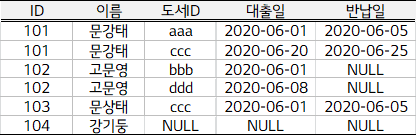

In [11]:
# SELECT * FROM ~ : 전체 조회
for row in c.execute('SELECT * FROM 도서대출내역'):
  print(row)

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('101', '문강태', 'ccc', '2020-06-20', '2020-06-25')
('102', '고문영', 'bbb', '2020-06-01', None)
('102', '고문영', 'ddd', '2020-06-08', None)
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')
('104', '강기둥', None, None, None)


In [12]:
# 특정 컬럼을 지정
for row in c.execute('SELECT ID FROM 도서대출내역'):
  print(row)

('101',)
('101',)
('102',)
('102',)
('103',)
('104',)


In [13]:
# 조건을 입력하기 (이름이 문강태인 행(row)만 가져와라)
for row in c.execute('SELECT * FROM 도서대출내역 WHERE 이름 = "문강태";'):
  print(row)

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('101', '문강태', 'ccc', '2020-06-20', '2020-06-25')


In [14]:
# GROUP BY로 중복 제거 (재정렬됨)
for row in c.execute('SELECT 이름 FROM 도서대출내역 GROUP BY 이름;'):
  print(row)

('강기둥',)
('고문영',)
('문강태',)
('문상태',)


In [15]:
# DISTINCT로 중복 제거
for row in c.execute('SELECT DISTINCT 이름 FROM 도서대출내역;'):
  print(row)

('문강태',)
('고문영',)
('문상태',)
('강기둥',)


In [16]:
# ORDER BY로 정렬(오름차순이 기본값)

# ASC 생략
for row in c.execute('SELECT * FROM 도서대출내역 ORDER BY ID ;'):
  print(row)

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('101', '문강태', 'ccc', '2020-06-20', '2020-06-25')
('102', '고문영', 'bbb', '2020-06-01', None)
('102', '고문영', 'ddd', '2020-06-08', None)
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')
('104', '강기둥', None, None, None)


In [17]:
# 내림차순은 DESC
for row in c.execute('SELECT * FROM 도서대출내역 ORDER BY ID DESC ;'):
  print(row)

('104', '강기둥', None, None, None)
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')
('102', '고문영', 'bbb', '2020-06-01', None)
('102', '고문영', 'ddd', '2020-06-08', None)
('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('101', '문강태', 'ccc', '2020-06-20', '2020-06-25')


In [18]:
# 몇개의 row만 조회하기
for row in c.execute('SELECT * FROM 도서대출내역 LIMIT 5 ;'):
  print(row)

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('101', '문강태', 'ccc', '2020-06-20', '2020-06-25')
('102', '고문영', 'bbb', '2020-06-01', None)
('102', '고문영', 'ddd', '2020-06-08', None)
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')


In [19]:
# 연습
for row in c.execute('SELECT 이름, 대출일, 반납일 FROM 도서대출내역 ORDER BY 대출일 DESC LIMIT 1;'):
	print(row)

('문강태', '2020-06-20', '2020-06-25')


#### DISTINCT와 GROUP BY 차이
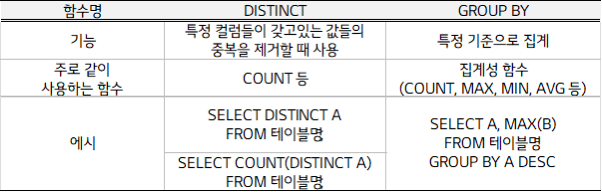

추가로, '기준 별로 중복없이 집계를 하고 싶다!'라고 할 때에는 집계함수와 더불어 DISTINCT, GROUP BY를 모두 활용해야 합니다. 
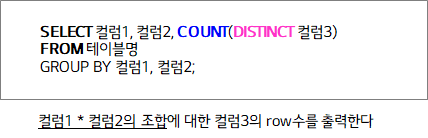

In [20]:
# '도서대출내역' 테이블에서 |이름|대출건수| 를 출력하는 쿼리 (GROUP BY 이름 활용)
for row in c.execute('SELECT 이름, COUNT(*) AS 대출건수 FROM 도서대출내역 GROUP BY 이름'):
    print(row)

('강기둥', 1)
('고문영', 2)
('문강태', 2)
('문상태', 1)


### SQL Data Type
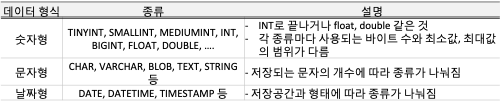
숫자는 거의 INT로 끝납니다.  
INT는 종류별로 그 안에 넣을 수 있는 바이트(bite) 수가 다른데요.  
따라서 우리가 넣을 숫자의 범위(최솟값, 최댓값)와 크기가 어느 정도 될지를 생각하여 타입을 정해주는 것을 권장합니다.  

문자형과 날짜형도 마찬가지입니다.

In [21]:
for row in c.execute('SELECT * FROM 도서대출내역2;'):
  print(row)

('101', '문강태', '2020-06', '20일')
('102', '고문영', '2020-06', '10일')
('103', '문상태', '2020-06', '8일')
('104', '강기둥', '2020-06', '3일')


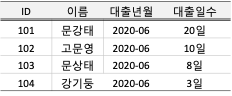

In [26]:
import os
db_path = os.getenv('HOME')+'/mydb.db'
conn = sqlite3.connect(db_path)  # mydb.db에 연결합니다.
c = conn.cursor()

# sqlite에서는 pragma table_info('테이블명')문으로 타입 정의 확인
for row in c.execute('pragma table_info(도서대출내역)'):
  print(row)

(0, 'ID', 'varchar', 0, None, 0)
(1, '이름', 'varchar', 0, None, 0)
(2, '도서ID', 'varchar', 0, None, 0)
(3, '대출일', 'varchar', 0, None, 0)
(4, '반납일', 'varchar', 0, None, 0)


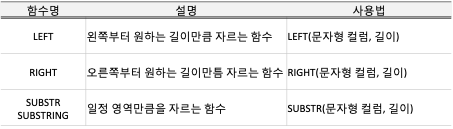

In [27]:
# '일'이라는 문자 제거
for row in c.execute('SELECT *, SUBSTR(대출일수, 1, (length(대출일수)-1)) AS 대출일수_수정 FROM 도서대출내역2;'):
  print(row)

('101', '문강태', '2020-06', '20일', '20')
('102', '고문영', '2020-06', '10일', '10')
('103', '문상태', '2020-06', '8일', '8')
('104', '강기둥', '2020-06', '3일', '3')


In [28]:
# CAST로 숫자로 변환
for row in c.execute('SELECT *, CAST(SUBSTR(대출일수, 1, (length(대출일수)-1)) AS INT) AS 대출일수_수정 FROM 도서대출내역2 ;'):
  print(row)

('101', '문강태', '2020-06', '20일', 20)
('102', '고문영', '2020-06', '10일', 10)
('103', '문상태', '2020-06', '8일', 8)
('104', '강기둥', '2020-06', '3일', 3)


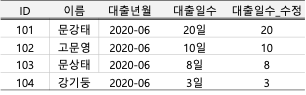

In [29]:
# '대출일수_수정' 컬럼의 평균을 구해볼까요? 필요한 컬럼만 가져와 보도록 하겠습니다.
for row in c.execute('SELECT ID, 이름, 대출년월, AVG(CAST(SUBSTR(대출일수, 1, (length(대출일수)-1)) AS INT)) AS 대출일수_평균 FROM 도서대출내역2 GROUP BY 1,2,3;'):
  print(row)

('101', '문강태', '2020-06', 20.0)
('102', '고문영', '2020-06', 10.0)
('103', '문상태', '2020-06', 8.0)
('104', '강기둥', '2020-06', 3.0)


### SQL 다양한 조건으로 조회하기
함수보다도 더 많이 쓰게 되는 것은 WHERE 절에서 쓰는 조건들입니다. 

#### WHERE 조건에 다양한 조건 입력하기
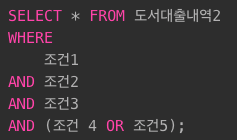

WHERE 조건절 안에서 쓸 수 있는 몇 가지를 살펴보겠습니다.

1. 특정 문자를 포함하는 row를 가져오고 싶을 때
2. 특정 기간 혹은 특정 날짜의 전 또는 이후의 row를 가져오고 싶을 때
3. 특정 숫자 이상 또는 이하의 row를 가져오고 싶을 때
4. NULL 조건을 다루는 방법

##### 1. 특정 문자를 포함하는 row를 가져오고 싶을 때
"문%"은 '문'으로 시작하는 모든 문자열을 다 가져오라는 명령이 됩니다.

'%문%'으로 조회를 한다면 이름의 시작, 중간, 끝의 어딘가에 '문'이 존재한다면 모두 가져오라는 명령이 됩니다.

'%문'으로 조회하면 '문'으로 끝나는 모든 문자열을 다 가져오라는 명령이 된답니다.

In [30]:
for row in c.execute('SELECT * FROM 도서대출내역2 WHERE 이름 LIKE "문%" ;'):
  print(row)

('101', '문강태', '2020-06', '20일')
('103', '문상태', '2020-06', '8일')


##### 2. 특정 기간 혹은 특정 날짜의 이전 또는 이후의 row를 가져오고 싶을 때
날짜 관련 데이터가 있을 때

In [31]:
# 6월 첫째 주에 대출을 한 사람들의 정보
for row in c.execute('SELECT * FROM 도서대출내역 WHERE 대출일 >= "2020-06-01" AND 대출일 <= "2020-06-07" ;'):
  print(row)

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('102', '고문영', 'bbb', '2020-06-01', None)
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')


In [32]:
# 부등호가 아닌 BETWEEN 함수 활용 (시작과 종료일을 포함해야 함)
for row in c.execute('SELECT * FROM 도서대출내역 WHERE 대출일 BETWEEN "2020-06-01" AND "2020-06-07" ;'):
  print(row)

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('102', '고문영', 'bbb', '2020-06-01', None)
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')


##### 3. 특정 숫자 이상 또는 이하의 row를 조회하고 싶을 때


In [33]:
# 대출일수가 5일을 초과하는 사람들의 정보
for row in c.execute('SELECT *, CAST(SUBSTR(대출일수, 1, (length(대출일수)-1)) AS INT) AS 대출일수_수정 FROM 도서대출내역2 WHERE 대출일수_수정 > 5 '):
  print(row)

('101', '문강태', '2020-06', '20일', 20)
('102', '고문영', '2020-06', '10일', 10)
('103', '문상태', '2020-06', '8일', 8)


##### 4. NULL 조건을 다루는 방법


In [34]:
# 반납일이 NULL이 아닌 것
for row in c.execute('SELECT * FROM 도서대출내역 WHERE 반납일 IS NOT NULL;'):
  print(row)

('101', '문강태', 'aaa', '2020-06-01', '2020-06-05')
('101', '문강태', 'ccc', '2020-06-20', '2020-06-25')
('103', '문상태', 'ccc', '2020-06-01', '2020-06-05')


In [35]:
# 아직 책을 반납하지 않은 사람들
for row in c.execute('SELECT * FROM 도서대출내역 WHERE 반납일 IS NULL;'):
  print(row)

('102', '고문영', 'bbb', '2020-06-01', None)
('102', '고문영', 'ddd', '2020-06-08', None)
('104', '강기둥', None, None, None)


In [36]:
'''
조건 1 : 이름이 '태'로 끝나는 데이터를 조회
조건 2 : 대출일이 2020년 6월 19일 이후인 데이터를 조회
조건 3 : ID가 102 아래인 데이터를 조회
조건 4 : 반납일이 NULL이 아닌 데이터를 조회
'''
for row in c.execute('SELECT 이름 FROM 도서대출내역 WHERE 이름 LIKE "%태" AND 대출일 >= "2020-06-19" AND ID<102 AND 반납일 IS NOT NULL'):
    print(row)

('문강태',)


## SQL JOIN 수행하기
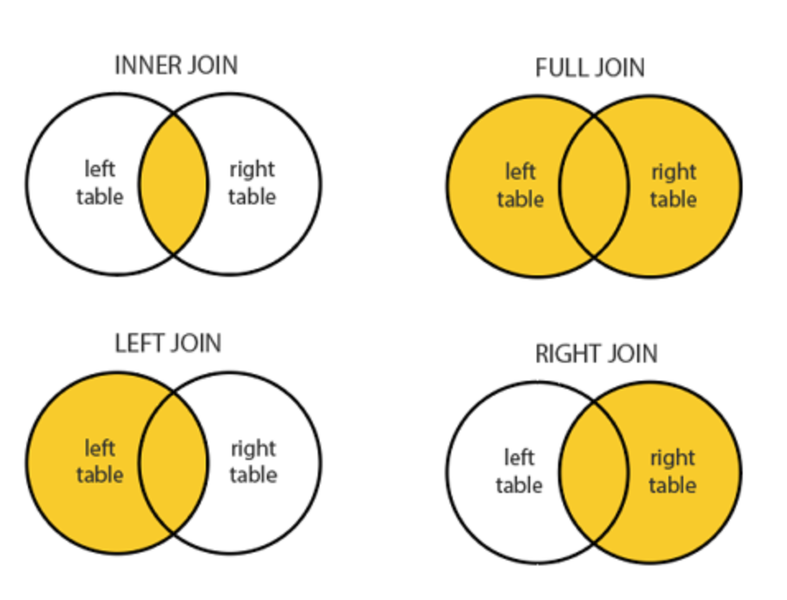
[출처 : https://www.dofactory.com/sql/join]

In [37]:
import os
db_path = os.getenv('HOME')+'/mydb.db'
conn = sqlite3.connect(db_path)  # mydb.db에 연결합니다.
c = conn.cursor()

### JOIN의 기본 구문
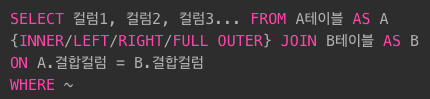

In [38]:
print('대출내역 테이블')
for row in c.execute('SELECT * FROM 대출내역;'):
  print(row)
print('')
print('도서명 테이블')
for row in c.execute('SELECT * FROM 도서명;'):
  print(row)

대출내역 테이블
('101', '문강태', 'aaa')
('102', '고문영', 'bbb')
('102', '고문영', 'fff')
('103', '문상태', 'ccc')
('104', '강기둥', None)

도서명 테이블
('aaa', '악몽을 먹고 자란 소년')
('bbb', '좀비아이')
('ccc', '공룡백과사전')
('ddd', '빨간구두')
('eee', '잠자는 숲속의 미녀')


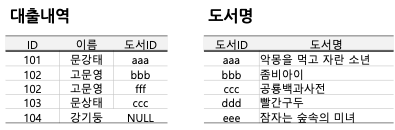

### 1) INNER JOIN
INNER JOIN은 두 테이블의 교집합을 뱉어주는 명령어

In [39]:
query = '''
SELECT A.*, B.도서명 
FROM 대출내역 AS A 
INNER JOIN 도서명 AS B
ON A.도서ID = B.도서ID;
'''
for row in c.execute(query):
  print(row)

('101', '문강태', 'aaa', '악몽을 먹고 자란 소년')
('102', '고문영', 'bbb', '좀비아이')
('103', '문상태', 'ccc', '공룡백과사전')


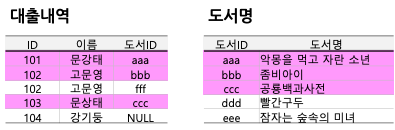
머릿속으로 그려보면, 도서ID를 기준으로 합친다고 했을 때 공통되는 부분은 'aaa, bbb, ccc' 세 개입니다.

따라서 아래와 같이 결과가 나올 것입니다.


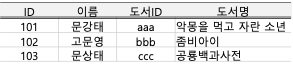

### 2) LEFT JOIN
LEFT JOIN은 왼쪽 A 테이블을 기준으로 오른쪽 테이블을 붙이는 것

In [40]:
query = '''
SELECT A.*, B.도서명 
FROM 대출내역 AS A 
LEFT JOIN 도서명 AS B
ON A.도서ID = B.도서ID;
'''
for row in c.execute(query):
  print(row)

('101', '문강태', 'aaa', '악몽을 먹고 자란 소년')
('102', '고문영', 'bbb', '좀비아이')
('102', '고문영', 'fff', None)
('103', '문상태', 'ccc', '공룡백과사전')
('104', '강기둥', None, None)


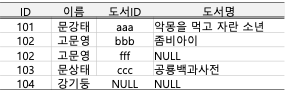
도서명만 오른쪽에 붙은 것을 확인할 수 있습니다.  
도서명에 도서ID 'fff'가 없으므로 세 번째 줄은 NULL이 생성되었고, 강기둥의 도서ID는 NULL이므로 도서명도 NULL이 됩니다.


현재 SQLite에서는 RIGHT JOIN과 FULL OUTER JOIN를 지원하지 않습니다.  
그래도 두 개념을 숙지하고 넘어가도록 하겠습니다. 

### 3) RIGHT JOIN
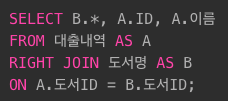

### 4) FULL OUTER JOIN
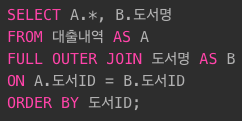

### 5) 중첩 질의(Nested Query)
위에서 다룬 LEFT JOIN을 사용한 서브쿼리의 결과 C로부터 다시 쿼리를 수행하는 형태로 쿼리가 중첩되어 있습니다.

In [41]:
query = '''
SELECT C.이름, COUNT(*) 대출건수
FROM (
	SELECT A.*, B.도서명 
	FROM 대출내역 AS A 
	LEFT JOIN 도서명 AS B
	ON A.도서ID = B.도서ID ) C
GROUP BY C.이름;
'''
for row in c.execute(query):
  print(row)

('강기둥', 1)
('고문영', 2)
('문강태', 1)
('문상태', 1)


### 6) 쿼리의 조건절(1) IFNULL
NULL 대신 다른 값으로 바꾸어 출력하고 싶을 때

In [42]:
query = '''
SELECT A.*, IFNULL(B.도서명, '도서명미상') AS 도서명
	FROM 대출내역 AS A 
	LEFT JOIN 도서명 AS B
	ON A.도서ID = B.도서ID;
'''
for row in c.execute(query):
  print(row)

('101', '문강태', 'aaa', '악몽을 먹고 자란 소년')
('102', '고문영', 'bbb', '좀비아이')
('102', '고문영', 'fff', '도서명미상')
('103', '문상태', 'ccc', '공룡백과사전')
('104', '강기둥', None, '도서명미상')


### 6) 쿼리의 조건절(2) CASE
프로그래밍에서의 IF문처럼 조건에 따라 다양한 출력이 가능하도록 해주는 매우 강력하고 유용한 함수입니다.  
https://www.sqlitetutorial.net/sqlite-case/

In [43]:
query = '''
SELECT 이름, 
CASE WHEN 대출일수_수정 > 5 
    THEN '기간초과' 
    ELSE '기간내' 
END AS 대출기간
FROM (
    SELECT *, CAST(SUBSTR(대출일수, 1, (length(대출일수)-1)) AS INT) AS 대출일수_수정 
    FROM 도서대출내역2
);
'''
for row in c.execute(query):
  print(row)

('문강태', '기간초과')
('고문영', '기간초과')
('문상태', '기간초과')
('강기둥', '기간내')


In [46]:
'''
'도서명' 테이블과 '도서대출내역' 테이블을 도서ID를 key로 하여 
LEFT JOIN해서 |도서ID|도서명|대출건수|대출상태| 항목을 출력하는 쿼리를 작성해 보세요.

대출건수 : 도서별로 도서대출내역 테이블에 대출일자가 있으면 대출건수 1로 본다. 
         여러 번 대출되었으면 대출된 회수만큼 합산된다.
대출상태 : 대출일자는 NOT NULL인데 반납일자가 NULL인 도서대출내역이 있으면 
         '대출중', 그렇지 않고 모든 대출내역에 반납일자가 명시되어 있으면 '보관중'으로 본다.
'''

query = '''
SELECT 
  C.도서ID, 
  C.도서명, 
  SUM(C.대출건수) AS 대출건수, 
  CASE SUM(C.대출건수)- SUM(C.반납건수) WHEN 0 THEN '보관중' ELSE '대출중' END AS 대출상태 
FROM 
  (
    SELECT 
      A.도서ID, 
      A.도서명, 
      CASE WHEN B.대출일 IS NULL THEN 0 ELSE 1 END AS 대출건수, 
      CASE WHEN B.반납일 IS NULL THEN 0 ELSE 1 END AS 반납건수 
    FROM 
      도서명 AS A 
      LEFT JOIN 도서대출내역 AS B ON A.도서ID = B.도서ID
  ) AS C 
GROUP BY 
  C.도서ID, 
  C.도서명;
'''

for row in c.execute(query):
    print(row)

('aaa', '악몽을 먹고 자란 소년', 1, '보관중')
('bbb', '좀비아이', 1, '대출중')
('ccc', '공룡백과사전', 2, '보관중')
('ddd', '빨간구두', 1, '대출중')
('eee', '잠자는 숲속의 미녀', 0, '보관중')
